In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [113]:
com=pd.read_csv('data.csv')
com

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,NaN
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [114]:
# Checking for information of Data Frame
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [115]:
# Checking for null values
com.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           1
dtype: int64

In [116]:
# Checking the relation between Columns

# Replace non-numeric values with NaN
df_numeric = com.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df_numeric.dropna(inplace=True)

# Calculate correlation
corr_matrix = df_numeric.corr()


In [90]:
# Grouping by categorical coumns
com.groupby(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']).count()

Dependents  \
Gender Married Education    Self_Employed Property_Area Loan_Status               
Female No      Graduate     No            Rural         N                     3   
                                                        Y                    10   
                                          Semiurban     N                     9   
                                                        Y                    12   
                                          Urban         N                     6   
...                                                                         ...   
Male   Yes     Not Graduate Yes           Rural         Y                     1   
                                          Semiurban     N                     1   
                                                        Y                     2   
                                          Urban         N                     0   
                                                        Y                     2   

                                                                     ApplicantIncome  \
Gender Married Education    Self_Employed Property_Area Loan_Status                    
Female No      Graduate     No            Rural         N                          3   
                                                        Y                         10   
                                          Semiurban     N                          9   
                                                        Y                         12   
                                          Urban         N                          7   
...                                                                              ...   
Male   Yes     Not Graduate Yes           Rural         Y                          1   
                                          Semiurban     N                          1   
                                                        Y                          2   
                                          Urban         N                          1   
                                                        Y                          2   

                                                                     CoapplicantIncome  \
Gender Married Education    Self_Employed Property_Area Loan_Status                      
Female No      Graduate     No            Rural         N                            3   
                                                        Y                           10   
                                          Semiurban     N                            9   
                                                        Y                           12   
                                          Urban         N                            7   
...                                                                                ...   
Male   Yes     Not Graduate Yes           Rural         Y                            1   
                                          Semiurban     N                            1   
                                                        Y                            2   
                                          Urban         N                            1   
                                                        Y                            2   

                                                                     LoanAmount  \
Gender Married Education    Self_Employed Property_Area Loan_Status               
Female No      Graduate     No            Rural         N                     3   
                                                        Y                    10   
                                          Semiurban     N                     9   
                                                        Y                    12   
                                          Urban         N                     7   
...                                                                         ...   
Male   Ye

In [117]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
com['Gender']= label_encoder.fit_transform(com['Gender']) 
com['Property_Area']= label_encoder.fit_transform(com['Property_Area'])
com['Married']= label_encoder.fit_transform(com['Married'])
com['Education']= label_encoder.fit_transform(com['Education'])
com['Self_Employed']= label_encoder.fit_transform(com['Self_Employed'])
com['Loan_Status']= label_encoder.fit_transform(com['Loan_Status'])


In [118]:
com.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Visualization

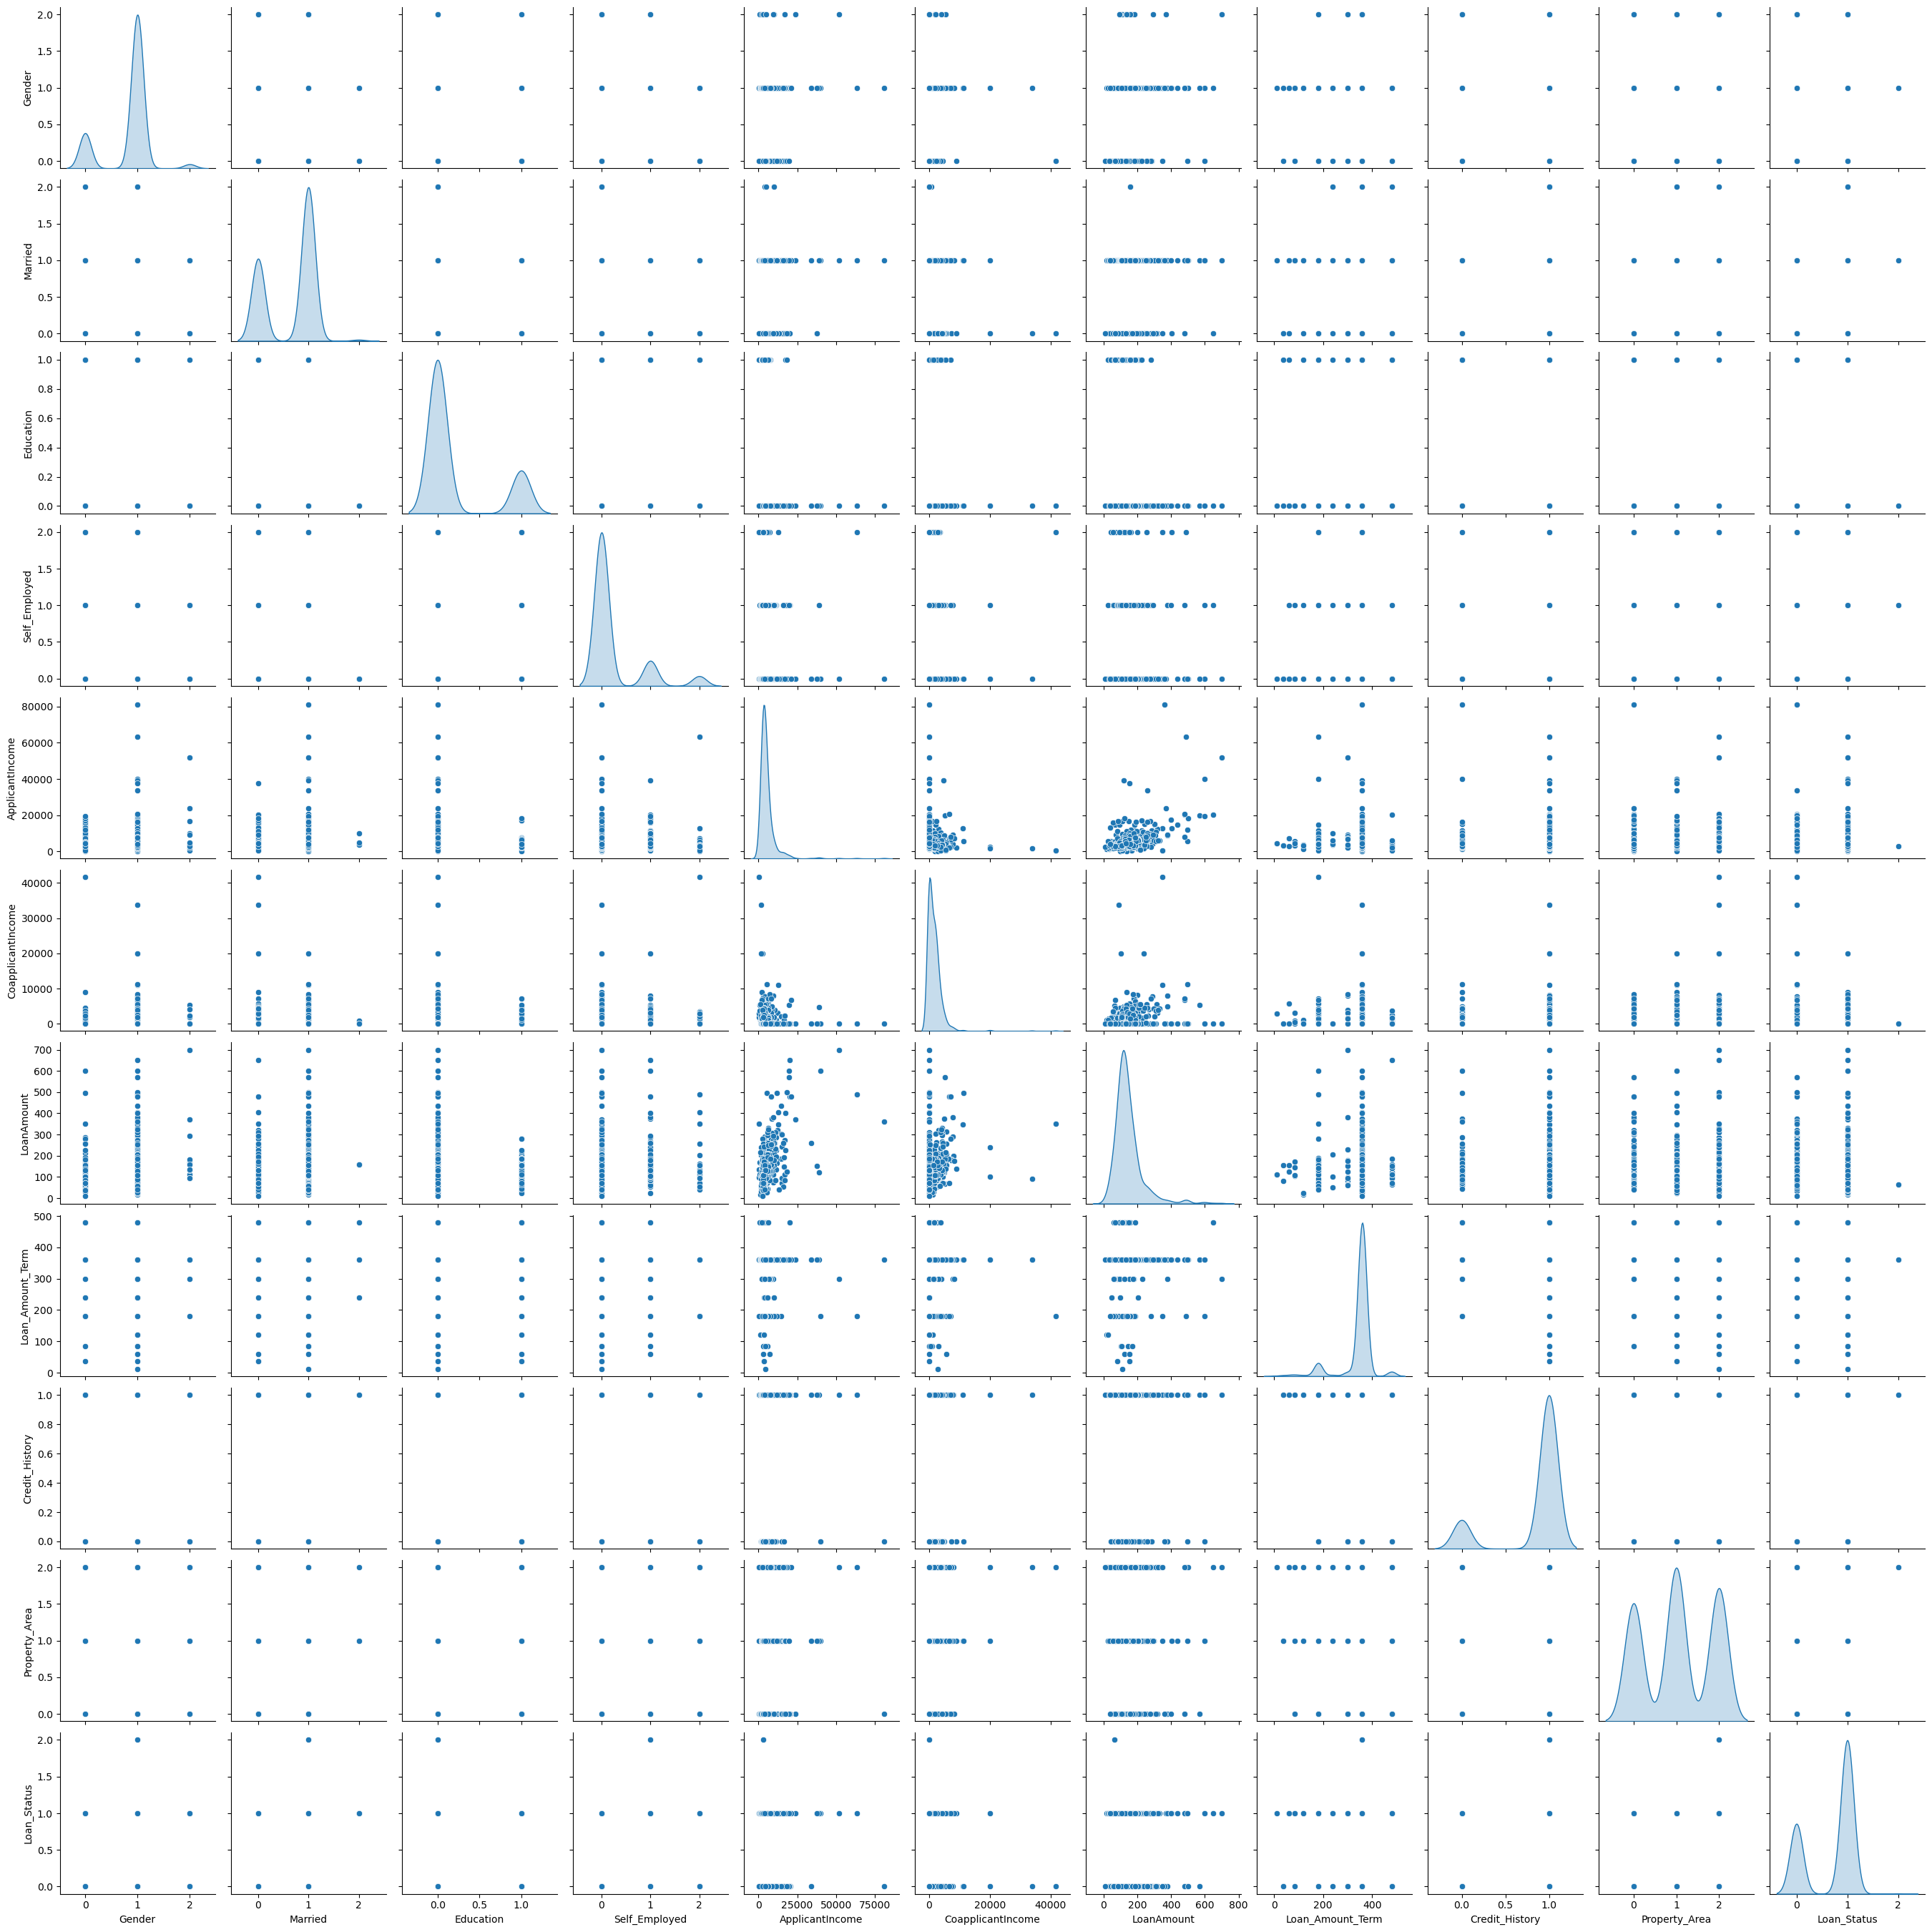

In [70]:
# Pair potting
sns.pairplot(com, diag_kind='kde')

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

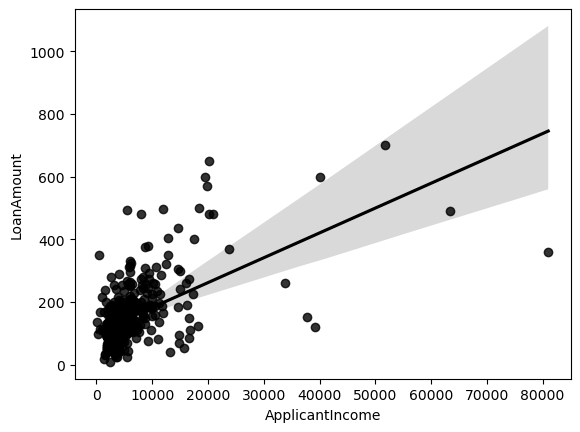

In [92]:
# Regression Plot
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=com, color='black')

In [119]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler

# Handling missing values
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
numerical_columns = ['LoanAmount']

# Fill missing values in categorical columns with mode
for col in categorical_columns:
    com[col].fillna(com[col].mode()[0], inplace=True)

# Fill missing values in numerical columns with mean
for col in numerical_columns:
    com[col].fillna(com[col].mean(), inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    com[col] = encoder.fit_transform(com[col])

# Normalize numerical features
scaler =  MaxAbsScaler()
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
com[numerical_columns] = scaler.fit_transform(com[numerical_columns])

com.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.5,0.0,0.000000,0.0,0.0,0.072210,0.000000,0.209160,0.888889,1.0,1.0,0.5
1,0.5,0.5,0.333333,0.0,0.0,0.056580,0.036192,0.182857,0.888889,1.0,0.0,0.0
2,0.5,0.5,0.000000,0.0,0.5,0.037037,0.000000,0.094286,0.888889,1.0,1.0,1.0
3,0.5,0.5,0.000000,1.0,0.0,0.031889,0.056592,0.171429,0.888889,1.0,1.0,0.5
4,0.5,0.0,0.000000,0.0,0.0,0.074074,0.000000,0.201429,0.888889,1.0,1.0,0.5


<Axes: >

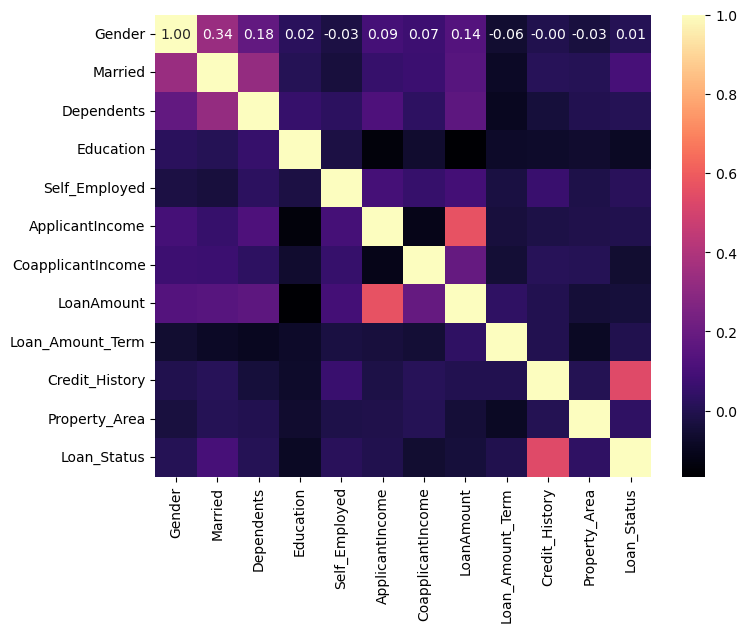

In [73]:
plt.figure(figsize = (8, 6));
sns.heatmap(com.corr(), cmap='magma', annot=True, fmt=".2f")

<Axes: xlabel='Loan_Status'>

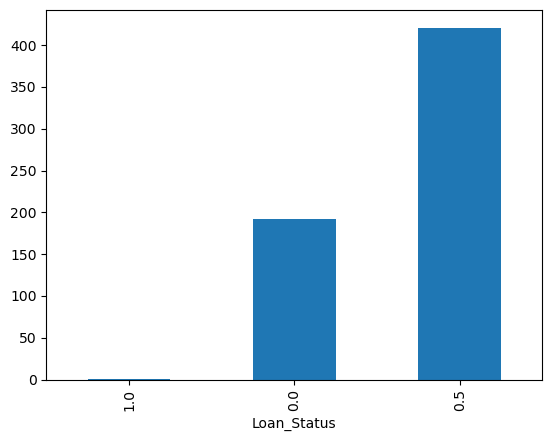

In [74]:
com.Loan_Status.value_counts(ascending=True).plot(kind='bar')

In [138]:

X = com.iloc[:, :-1]  # Features (all columns except the last)
y = com.iloc[:, -1]   # Target labels (last column)
y = encoder.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54, shuffle=False)

In [143]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.5,0.0,0.000000,0.0,0.0,0.072210,0.000000,0.209160,0.888889,1.0,1.0
1,0.5,0.5,0.333333,0.0,0.0,0.056580,0.036192,0.182857,0.888889,1.0,0.0
2,0.5,0.5,0.000000,0.0,0.5,0.037037,0.000000,0.094286,0.888889,1.0,1.0
3,0.5,0.5,0.000000,1.0,0.0,0.031889,0.056592,0.171429,0.888889,1.0,1.0
4,0.5,0.0,0.000000,0.0,0.0,0.074074,0.000000,0.201429,0.888889,1.0,1.0


In [148]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
552,0.5,0.5,0.333333,0.0,0.0,0.041148,0.077999,0.225714,0.888889,1.0,1.0
553,0.5,0.5,0.000000,1.0,0.0,0.030296,0.055992,0.258571,0.888889,0.0,1.0
554,0.5,0.5,0.000000,0.0,0.0,0.044358,0.102383,0.188571,0.555556,0.0,0.0
555,0.5,0.5,0.333333,0.0,0.0,0.067506,0.024768,0.037143,0.888889,1.0,0.5
556,0.0,0.0,0.000000,0.0,0.0,0.032926,0.039000,0.120000,0.888889,1.0,1.0


In [142]:
y_train_series = pd.Series(y_train)

# Now you can use .head() to inspect the first few rows
print(y_train_series.head())

0    1
1    0
2    2
3    1
4    1
dtype: int64


In [149]:
# Convert y_train from numpy array to pandas Series
y_train_series = pd.Series(y_test)

# Now you can use .head() to inspect the first few rows
print(y_train_series.head())

0    1
1    0
2    0
3    1
4    1
dtype: int64


### Random Forest Classifier

In [144]:

model = RandomForestClassifier(n_estimators=70, max_depth=5, random_state=10)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [145]:
# Calculate accuracy on test data
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11 10]
 [ 0 41]]


0.8387096774193549

In [146]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Macro Precision score: ", precision)
print("Macro Recall score: ", recall)
print("Macro F1 score: ", f1)

Macro Precision score:  0.803921568627451
Macro Recall score:  1.0
Macro F1 score:  0.891304347826087


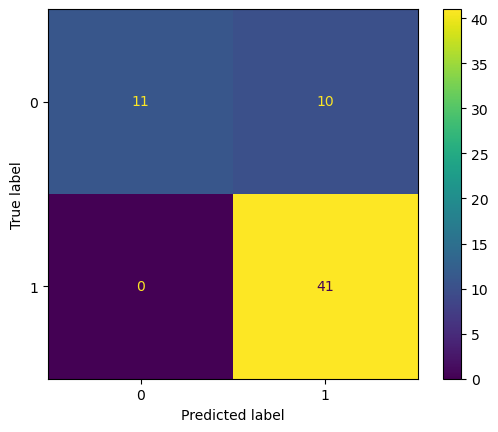

In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

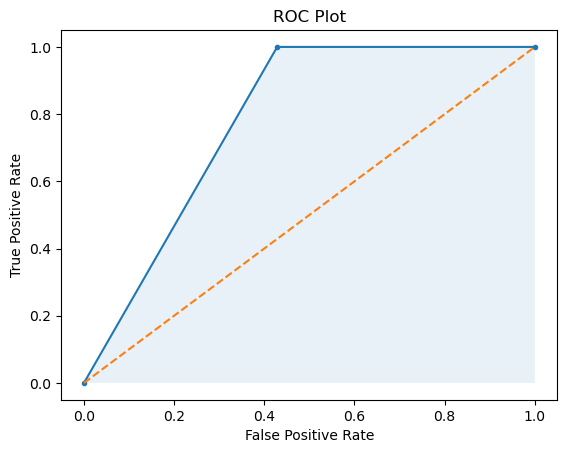

In [173]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], '--')
plt.fill_between(fpr, tpr, 0, alpha=0.1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [158]:
com = pd.read_csv("data.csv")
com.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,NaN
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
com.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           1
dtype: int64

In [160]:
#Drop rows where o/p label 'Loan_Status' has missing values
com.dropna(axis=0, how='any', subset=['Loan_Status'], inplace=True)
com.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [162]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler

# Handling missing values
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
numerical_columns = ['LoanAmount']

# Fill missing values in categorical columns with mode
for col in categorical_columns:
    com[col].fillna(com[col].mode()[0], inplace=True)

# Fill missing values in numerical columns with mean
for col in numerical_columns:
    com[col].fillna(com[col].mean(), inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    com[col] = encoder.fit_transform(com[col])

# Normalize numerical features
scaler =  MaxAbsScaler()
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
com[numerical_columns] = scaler.fit_transform(com[numerical_columns])

com.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.072210,0.000000,0.209355,0.888889,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.056580,0.036192,0.182857,0.888889,1.0,0.0,0.0
3,1.0,1.0,0.000000,1.0,0.0,0.031889,0.056592,0.171429,0.888889,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.074074,0.000000,0.201429,0.888889,1.0,1.0,1.0
5,1.0,1.0,0.666667,0.0,1.0,0.066877,0.100703,0.381429,0.888889,1.0,1.0,1.0


<Axes: ylabel='LoanAmount'>

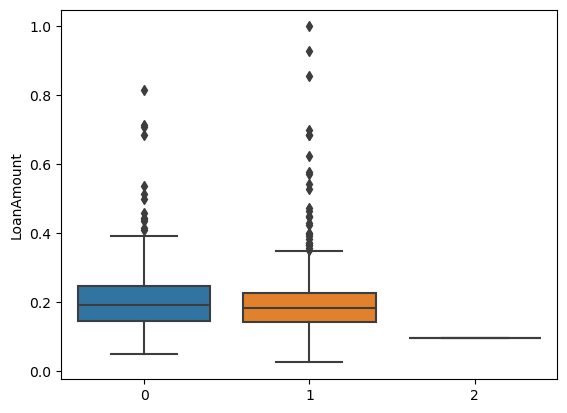

In [166]:
# # Drawing plots one by one 
def num_box_plot(df, x, y):     
    return sns.boxplot(data=df, x=x, y=y)

num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
outut_col = 'Loan_Status'

num_box_plot(X_train, y_train, num_col[2])

In [167]:
# Remove rows where CoapplicantIncome is greater than 12500
# Apply multiple conditions in one step
data_filtered = data[(data['CoapplicantIncome'] <= 0.2) & 
                     (data['ApplicantIncome'] <= 0.4) & 
                     (data['LoanAmount'] <= 0.6)]

data = data_filtered.copy()

data.shape

(590, 12)

In [168]:

X = com.iloc[:, :-1]  # Features (all columns except the last)
y = com.iloc[:, -1]   # Target labels (last column)
y = encoder.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54, shuffle=False)

In [169]:

model = RandomForestClassifier(n_estimators=70, max_depth=5, random_state=10)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [170]:
# Calculate accuracy on test data
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  9]
 [ 0 41]]


0.8548387096774194

In [171]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Macro Precision score: ", precision)
print("Macro Recall score: ", recall)
print("Macro F1 score: ", f1)

Macro Precision score:  0.82
Macro Recall score:  1.0
Macro F1 score:  0.9010989010989011


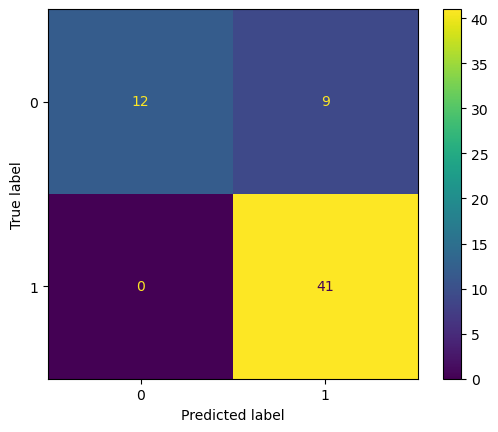

In [172]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

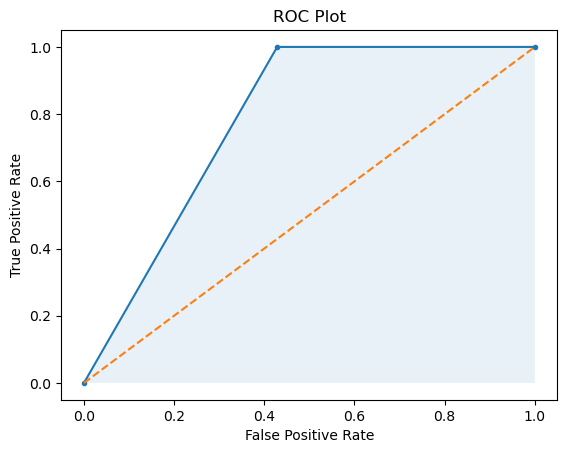

In [174]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], '--')
plt.fill_between(fpr, tpr, 0, alpha=0.1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()